In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml #mnist datasetini yüklemek için gerekli
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

mnist = fetch_openml("mnist_784")

In [2]:
 mnist.data.shape

(70000, 784)

In [3]:
def showimage(dframe, index):
    some_digit = dframe.to_numpy()[index]
    some_digit_image = some_digit.reshape(28, 28)
    
    plt.imshow(some_digit_image, cmap = "binary")
    plt.axis("off") 
    plt.show()

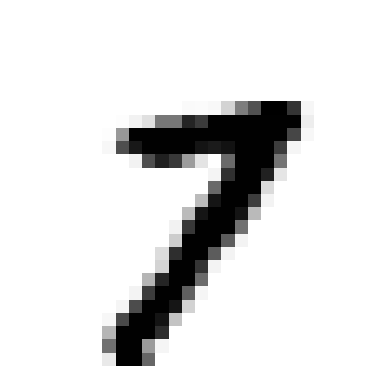

In [4]:
showimage(mnist.data, 40000)

In [5]:
train_img, test_img, train_lbl, test_lbl = train_test_split(mnist.data, mnist.target, test_size = 1/7.0, random_state = 0)

In [6]:
type(train_img)

pandas.core.frame.DataFrame

In [7]:
test_img_copy = test_img.copy()

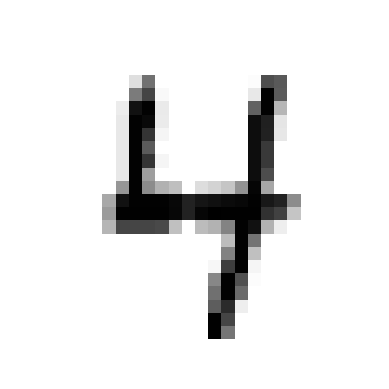

In [8]:
showimage(test_img_copy, 1)

In [9]:
scaler = StandardScaler()
#scaler'ı sadece training set üzerinde ft yapmamız yeterli
scaler.fit(train_img)

#ama transform işlemini hem training sete hem de test sete yapmamız gerekiyor
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

In [10]:
#PCA işlemini uyguluyoruz varianceın %95 oranında korunmasını istediğimizi belirtiyoruz
pca = PCA(.95)

In [11]:
#pcai sadece training sete yapmak yeterli
pca.fit(train_img)

PCA(n_components=0.95)

In [12]:
print(pca.n_components_)

327


In [13]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

In [16]:
#default solver çok yavaş çalıştığı için daha hızlı olan lbfgs solverı seçerek logisticregression nesnemizş oluşturuyoruz.
logisticRegr = LogisticRegression(solver = "lbfgs", max_iter = 10000)

In [17]:
#LogisticRegression modelimizi train datamı kullanarak eğitiyoruz
logisticRegr.fit(train_img, train_lbl)

LogisticRegression(max_iter=10000)

In [20]:
# el yazısı rakamları makine öğrenmesi ile tanıma ilşlemini gerçekleştirelim
logisticRegr.predict(test_img[0].reshape(1,-1))

array(['0'], dtype=object)

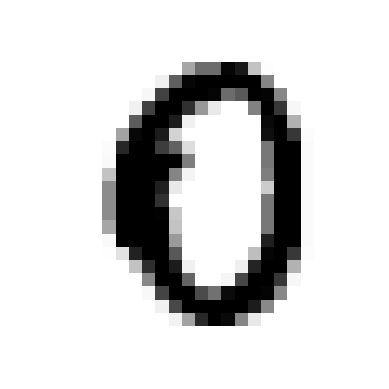

In [18]:
showimage(test_img_copy, 0)

In [29]:
logisticRegr.predict(test_img[1].reshape(1,-1))

array(['4'], dtype=object)

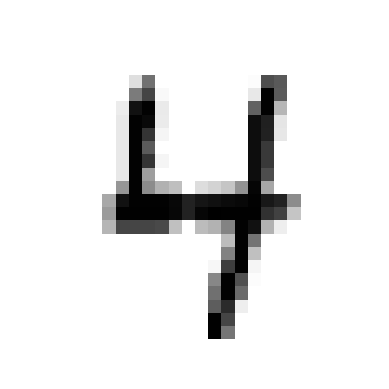

In [30]:
showimage(test_img_copy, 1)

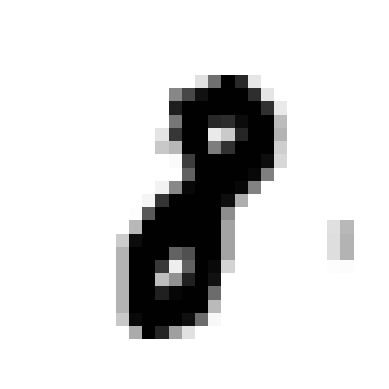

In [37]:
showimage(test_img_copy, 99)

In [36]:
logisticRegr.predict(test_img[99].reshape(1,-1))

array(['8'], dtype=object)

In [38]:
logisticRegr.score(test_img, test_lbl)

0.9184